In [19]:
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [15]:
jan_df = df[['site_eui','january_min_temp','january_avg_temp','january_max_temp']]
jan_df.head()

,site_eui,january_min_temp,january_avg_temp,january_max_temp
0,248.682615,36,50.5,68
1,26.500150,36,50.5,68
2,24.693619,36,50.5,68
3,48.406926,36,50.5,68
4,3.899395,36,50.5,68


In [17]:
jan_melted = jan_df.melt(id_vars=['site_eui'])
jan_melted

,site_eui,variable,value
0,248.682615,january_min_temp,36.0
1,26.500150,january_min_temp,36.0
2,24.693619,january_min_temp,36.0
3,48.406926,january_min_temp,36.0
4,3.899395,january_min_temp,36.0
...,...,...,...
227266,132.918411,january_max_temp,56.0
227267,39.483672,january_max_temp,56.0
227268,48.404398,january_max_temp,48.0
227269,592.022750,january_max_temp,48.0


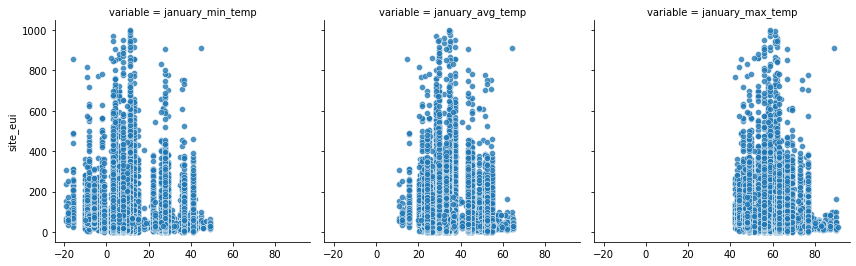

In [27]:
g = sns.FacetGrid(jan_melted, col="variable",height=4)
g.map(sns.scatterplot, "value", "site_eui",alpha=0.8)
g.set(xlabel=None)

In [49]:
df2 = df[df.loc[:, df.columns.str.startswith('jan')].columns]
df2

,january_min_temp,january_avg_temp,january_max_temp
0,36,50.500000,68
1,36,50.500000,68
2,36,50.500000,68
3,36,50.500000,68
4,36,50.500000,68
...,...,...,...
75752,28,43.451613,56
75753,28,43.451613,56
75754,26,36.612903,48
75755,26,36.612903,48


In [50]:
def plot_scatter(df,colnames):
    plot_df = df[df.loc[:, df.columns.str.startswith(colnames)].columns]
    plot_df = plot_df.assign(site_eui=df['site_eui'])
    melted_df = plot_df.melt(id_vars=['site_eui'])
    g = sns.FacetGrid(melted_df, col="variable",height=4)
    g.map(sns.scatterplot, "value", "site_eui",alpha=0.8)
    g.set(xlabel=None)

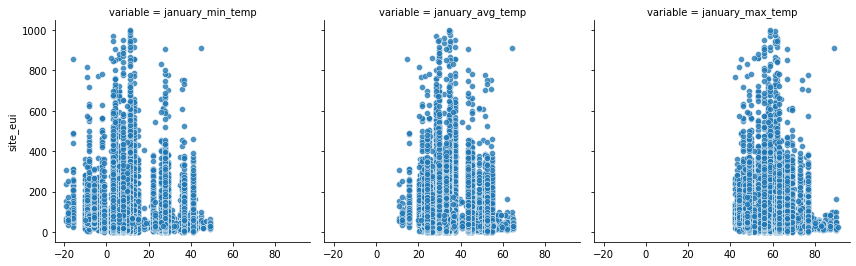

In [51]:
plot_scatter(df,'jan')

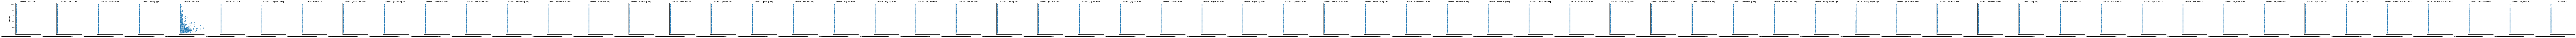

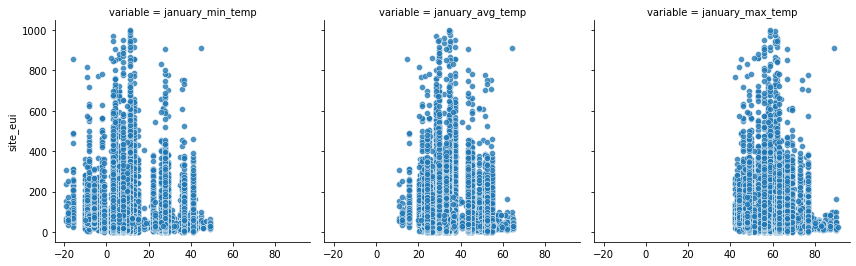

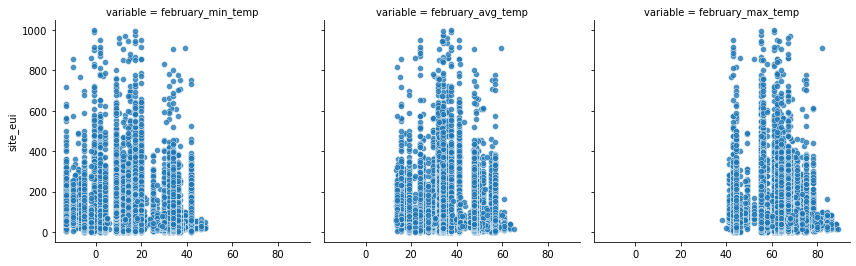

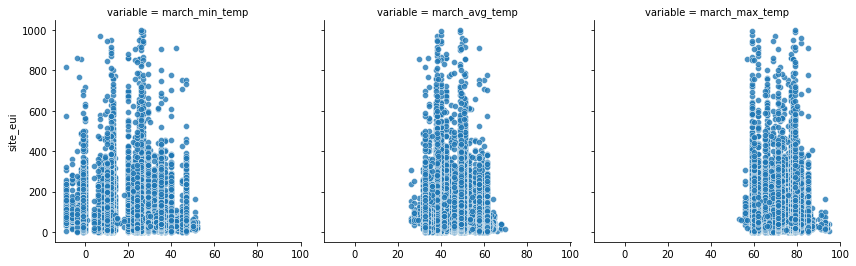

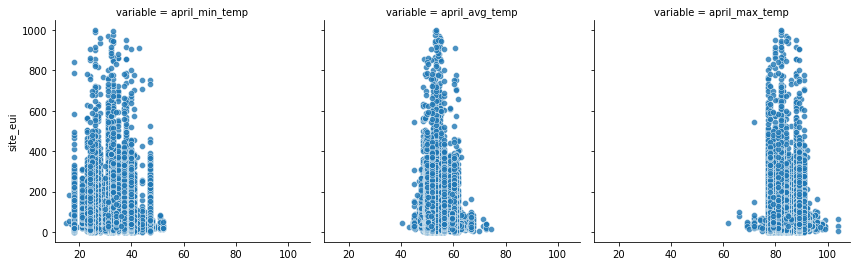

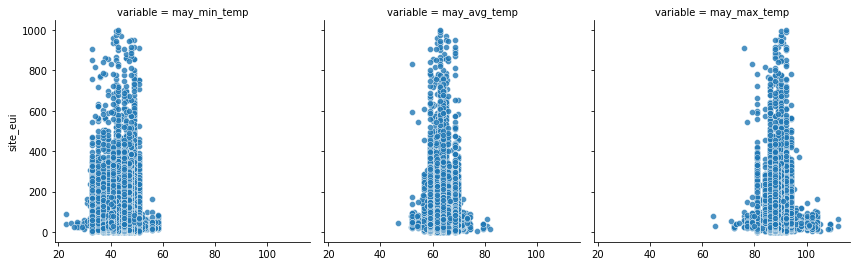

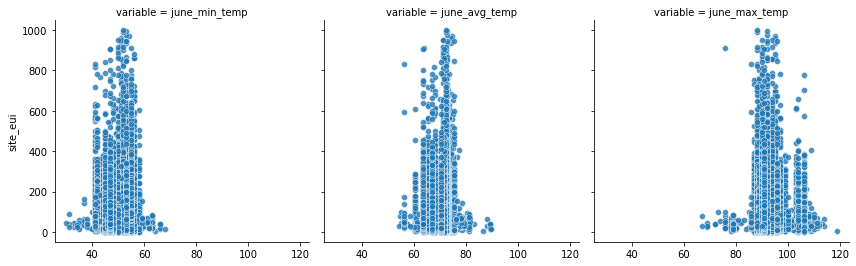

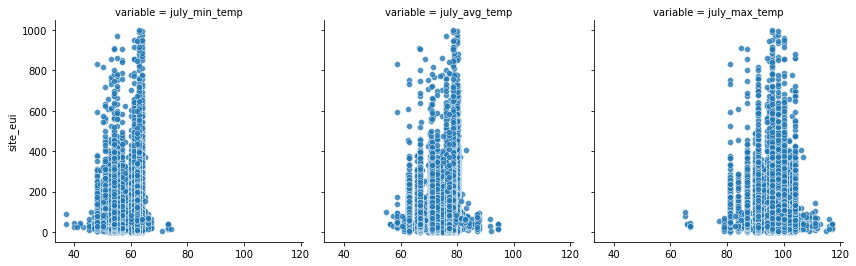

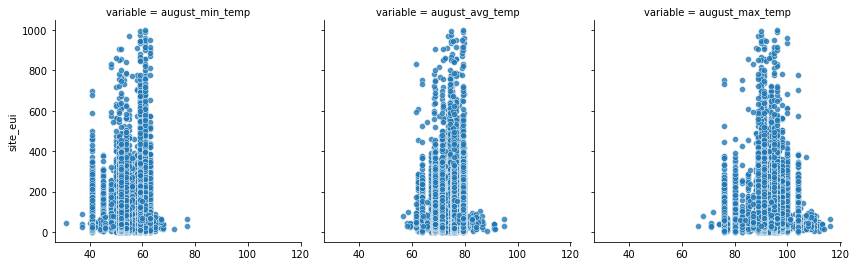

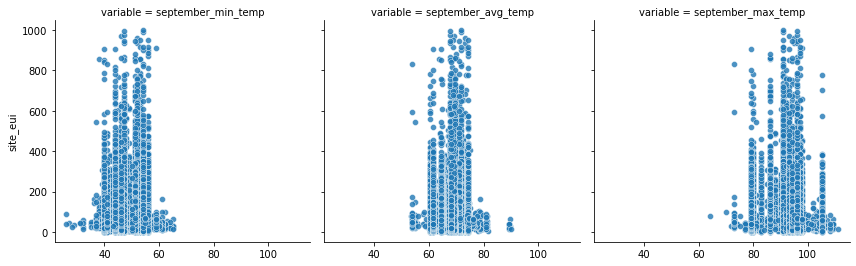

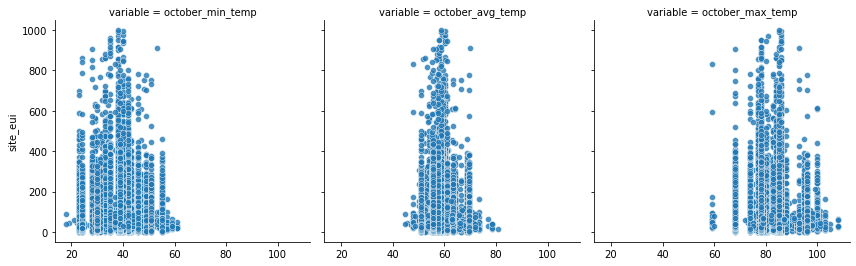

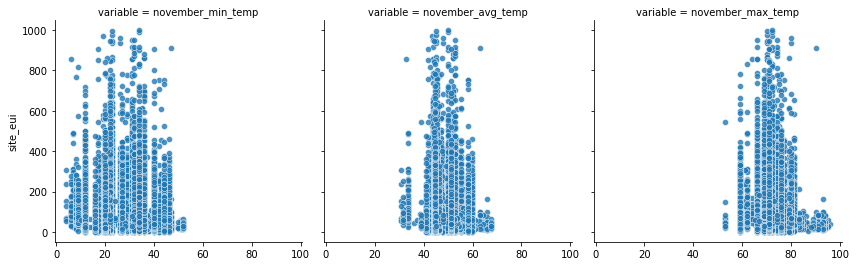

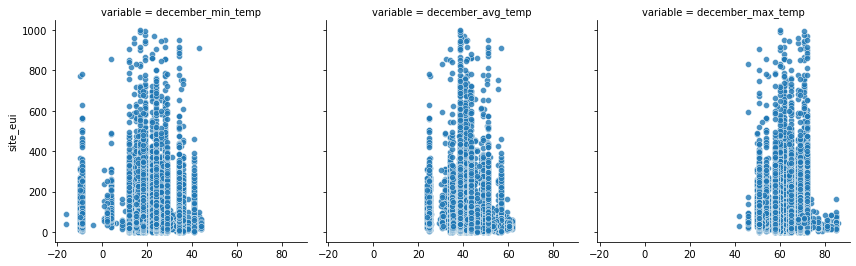

In [58]:
import calendar
for c in calendar.month_name:
    plot_scatter(df,c[:3].lower())